<a href="https://colab.research.google.com/github/bhuvansun/data-structures-and-algorithms-in-python/blob/main/project-trapping-rain-water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trapping Rain Water






In [ ]:
project_name = 'trapping-rain-water'

In [ ]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Problem Statement


Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.


Source: https://leetcode.com/problems/trapping-rain-water/

## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

This approach is explained in detail in [Lesson 1](https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity) of the course. Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

While this problem is stated clearly enough, it's always useful to try and express in your own words, in a way that makes it most clear for you.


**Problem**

>Given a list of non-negative integers denoting the height of a block, with each block having a width of 1 integer(0-1, 1-2 and so on), we need to find the rainwater that can be trapped between th block complex. In a more simpler way, we need to find the maximum number of block stuffings we can do in the structure without overflowing, which happens when the local maximum height is exceeded by the stuffings, or when the local minimum height is exceeded as well, leading to overflow in either of the cases.

<br/>


**Input**

1. **height = [0,1,0,2,1,0,1,3,2,1,2,1]**

**Output**

1. **6**

\
Visual representation: \
Source: https://assets.leetcode.com/uploads/2018/10/22/rainwatertrap.png

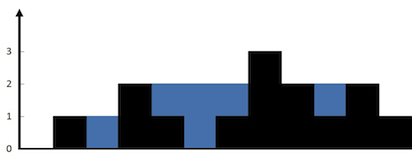

<br/>

Based on the above, we can now create a signature of our function:

In [ ]:
# Create a function signature here. The body of the function can contain a single statement: pass
def trap():
    pass

Save and upload your work before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. **All blocks are of same height.**
2. **Single block.**
3. **Generic test case.**
4. **Blocks arranged in ascending/descending order.**
5. **Different patterns in generic test cases.**


We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: `input` (a dictionary itself containing one key for each argument to the function and `output` (the expected result from the function).

In [ ]:
test = {
    'input': {
        'height': [5, 5, 5, 5, 5]
    },
    'output': 0
}

Create one test case for each of the scenarios listed above. We'll store our test cases in an array called `tests`.

In [ ]:
tests = []

In [ ]:
tests.append(test)

In [ ]:
tests.append({
    'input': {
        'height': [1]
    },
    'output': 0
})

In [ ]:
tests.append({
    'input': {
        'height': [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
    },
    'output': 6
})

In [ ]:
tests.append({
    'input': {
        'height': [1, 2, 3, 4, 5, 6]
    },
    'output': 0
})

In [ ]:
tests.append({
    'input': {
        'height': [4, 2, 0, 3, 2, 5]
    },
    'output': 9
})

In [ ]:
tests.append({
    'input': {
        'height': [2, 3, 1, 5, 4, 6, 1, 2, 0, 0, 3]
    },
    'output': 12
})

In [ ]:
tests.append({
    'input': {
        'height': [1, 4, 7, 1, 3, 0, 2, 12, 7, 5]
    },
    'output': 22
})

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may not necessarily be the most _efficient_ solution. Come with a correct solution and explain it in simple words below:

1. **The concept here is water that is going to get stored above any building would depend upon largest height of building to it's left and also the largest height of building to it's right.**
2. **You take the minimum of it as only till that height the water would accumulate**
3. **Now just subtract of height of the building you are currently at so you get the height of water above it.**
4. **Iterate this proess over each building.**


Let's save and upload our work before continuing.




In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


###  4. Implement the solution and test it using example inputs. Fix bugs, if any.

In [ ]:
def trap(height):
        # Array that stores largest element to itself in left
        LeftMaxIncludingCurrent = [0] * len(height)
        # Array that stores largest element to itself in right
        RightMaxIncludingCurrent = [0] * len(height)
        # This is just for simplicity, you actually don't need it, just take some counter over here
        Water = [0] * len(height)

        maxLeft = 0
        maxRight = 0

        # Fill up the LeftMaxIncludingCurrent Array
        for index in range(len(height)):
            maxLeft = max(maxLeft, height[index])
            LeftMaxIncludingCurrent[index] = maxLeft
        # Fill up the RightMaxIncludingCurrent Array
        for index in range(len(height)-1, -1, -1):
            maxRight = max(maxRight, height[index])
            RightMaxIncludingCurrent[index] = maxRight

        # Find the height of the water as discussed above in the concept
        for index in range(len(height)):
            Water[index] = min(LeftMaxIncludingCurrent[index], RightMaxIncludingCurrent[index]) -height[index]
        # Take the sum of water that accumulated above every other building to get total water that got accumulated.
        return sum(Water)

In [ ]:
trap([4, 2, 0, 3, 2, 5])

9

In [ ]:
trap([0,1,0,2,1,0,1,3,2,1,2,1])

6

In [ ]:
trap([3, 7, 1, 9, 3, 4])

7

We can test the function by passing the input to it directly or by using the `evaluate_test_case` function from `jovian`.

In [ ]:
test0 = {
    'input': {
        'height': [2, 8, 3, 1, 5]
    },
    'output': 6
}

In [ ]:
from jovian.pythondsa import evaluate_test_case

In [ ]:
evaluate_test_case(trap, test0)


Input:
{'height': [2, 8, 3, 1, 5]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.015 ms

Test Result:
PASSED



(6, True, 0.015)

Evaluate your function against all the test cases together using the `evaluate_test_cases` (plural) function from `jovian`.

In [ ]:
from jovian.pythondsa import evaluate_test_cases

In [ ]:
evaluate_test_cases(trap, tests)


TEST CASE #0

Input:
{'height': [5, 5, 5, 5, 5]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.031 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'height': [1]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.008 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'height': [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.022 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'height': [1, 2, 3, 4, 5, 6]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.013 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'height': [4, 2, 0, 3, 2, 5]}

Expected Output:
9


Actual Output:
9

Execution Time:
0.012 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'height': [2, 3, 1, 5, 4, 6, 1, 2, 0, 0, 3]}

Expected Output:
12


Actual Output:
12

Execution Time:
0.018 ms

Test Result:
PASSED


TEST CASE #6

Input:
{'height': [1, 4, 7, 1, 3, 0, 2, 12, 7, 5]}

Expected Output:
22


Actual Output:
22

Execution Time:
0.016 ms

Test Resu

[(0, True, 0.031),
 (0, True, 0.008),
 (6, True, 0.022),
 (0, True, 0.013),
 (9, True, 0.012),
 (12, True, 0.018),
 (22, True, 0.016)]

Verify that all the test cases were evaluated. We expect them all to fail, since we haven't implemented the function yet.

Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### 5. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [ ]:
trap_complexity = 'O(n)' # Since there are no nested loops involved, only 3 individual loops for computing left max height, right max height and the water trapped between.

In [ ]:
%%time
evaluate_test_cases(trap, tests)


TEST CASE #0

Input:
{'height': [5, 5, 5, 5, 5]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.018 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'height': [1]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.01 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'height': [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.031 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'height': [1, 2, 3, 4, 5, 6]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.012 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'height': [4, 2, 0, 3, 2, 5]}

Expected Output:
9


Actual Output:
9

Execution Time:
0.015 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'height': [2, 3, 1, 5, 4, 6, 1, 2, 0, 0, 3]}

Expected Output:
12


Actual Output:
12

Execution Time:
0.019 ms

Test Result:
PASSED


TEST CASE #6

Input:
{'height': [1, 4, 7, 1, 3, 0, 2, 12, 7, 5]}

Expected Output:
22


Actual Output:
22

Execution Time:
0.017 ms

Test Resul

[(0, True, 0.018),
 (0, True, 0.01),
 (6, True, 0.031),
 (0, True, 0.012),
 (9, True, 0.015),
 (12, True, 0.019),
 (22, True, 0.017)]

In [ ]:
trap_time = 6.48 # It took 6.48ms for computing the test cases.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

In [ ]:
# The above function works fine, but we can write a much simpler and a more readable function.
# We' re going to use a simple logic. This involves two pointers, pointing at the start and the end.
# Then, we take the maximum value from the left and the right regions, and add the difference to the output variable.
# The function will be explained in a greater detail in the below section.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### 7. Come up with a correct solution for the problem. State it in plain English.

Come with the optimized correct solution and explain it in simple words below:

1. **For index i, the water volume of i: vol_i = min(left_max_i, right_max_i) - bar_i.**
2. **The left_max array from left to right is always non-descending, the right_max is non-ascending.**
3. **Given i < j, if left_max_i <= right_max_j: vol_i = left_max_i - bar_i, otherwise, vol_j = right_max_j - bar_j**
4. **Because, if left_max_i <= right_max_j: left_max_i <= right_max_j <= right_max_j-1 <= ... <= right_max_i, then min(left_max_i, right_max_i) is always left_max_i**

Let's save and upload our work before continuing.



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [ ]:
# Simplified function
def trap_opt(height):
    if not height or len(height) < 3:
        return 0
    volume = 0
    left, right = 0, len(height) - 1
    l_max, r_max = height[left], height[right]
    while left < right:
        l_max, r_max = max(height[left], l_max), max(height[right], r_max)
        if l_max <= r_max:
            volume += l_max - height[left]
            left += 1
        else:
            volume += r_max - height[right]
            right -= 1
    return volume

### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

In [ ]:
evaluate_test_case(trap_opt, test0)


Input:
{'height': [2, 8, 3, 1, 5]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.009 ms

Test Result:
PASSED



(6, True, 0.009)

In [ ]:
evaluate_test_cases(trap_opt, tests)


TEST CASE #0

Input:
{'height': [5, 5, 5, 5, 5]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.009 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'height': [1]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'height': [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.012 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'height': [1, 2, 3, 4, 5, 6]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.007 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'height': [4, 2, 0, 3, 2, 5]}

Expected Output:
9


Actual Output:
9

Execution Time:
0.008 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'height': [2, 3, 1, 5, 4, 6, 1, 2, 0, 0, 3]}

Expected Output:
12


Actual Output:
12

Execution Time:
0.016 ms

Test Result:
PASSED


TEST CASE #6

Input:
{'height': [1, 4, 7, 1, 3, 0, 2, 12, 7, 5]}

Expected Output:
22


Actual Output:
22

Execution Time:
0.011 ms

Test Resu

[(0, True, 0.009),
 (0, True, 0.003),
 (6, True, 0.012),
 (0, True, 0.007),
 (9, True, 0.008),
 (12, True, 0.016),
 (22, True, 0.011)]

### 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [ ]:
trap_opt_complexity = 'O(n)' # Same complexity, but much simpler code.

In [ ]:
%%time
evaluate_test_cases(trap_opt, tests)


TEST CASE #0

Input:
{'height': [5, 5, 5, 5, 5]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.01 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'height': [1]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'height': [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.012 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'height': [1, 2, 3, 4, 5, 6]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.006 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'height': [4, 2, 0, 3, 2, 5]}

Expected Output:
9


Actual Output:
9

Execution Time:
0.006 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'height': [2, 3, 1, 5, 4, 6, 1, 2, 0, 0, 3]}

Expected Output:
12


Actual Output:
12

Execution Time:
0.01 ms

Test Result:
PASSED


TEST CASE #6

Input:
{'height': [1, 4, 7, 1, 3, 0, 2, 12, 7, 5]}

Expected Output:
22


Actual Output:
22

Execution Time:
0.009 ms

Test Result

[(0, True, 0.01),
 (0, True, 0.002),
 (6, True, 0.012),
 (0, True, 0.006),
 (9, True, 0.006),
 (12, True, 0.01),
 (22, True, 0.009)]

In [ ]:
trap_opt_time = 1.78 # It took 1.78 ms for the computation of the test cases, which is around 4 times faster than our initial function.

If you found the problem on an external platform, you can make a submission to test your solution.

Share your approach and start a discussion on the Jovian forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
